In [15]:
import folium
import os
import matplotlib.pyplot as plt
import pandas as pd
import rasterio 
import numpy

In [16]:
map = folium.Map([40.808, -92.265], zoom_start=6)

folium.Marker(
    location=([41.152, -96.454])
).add_to(map)

folium.Marker(
    location=([40.007, -88.288])
).add_to(map)

folium.Marker(
    location=([39.837, -88.588]) 
).add_to(map)

folium.Marker(
    location=([39.721, -88.233])
).add_to(map)

folium.Marker(
    location=([39.724, -89.064])
).add_to(map)

folium.Marker(
    location=([39.055, -90.190])
).add_to(map)

folium.Marker(
    location=([39.890, -88.216])
).add_to(map)

folium.Marker(
    location=([39.886, -88.151])
).add_to(map)

map

In [17]:
df = pd.read_csv('./data/U.S. Midwest fields/locations.csv')

# df = df[df['site'] == 'NE']
# print(min(df['X']), min(df['Y']), max(df['X']), max(df['Y']), sep=", ")

map = folium.Map()

for index, row in df.iterrows():
    folium.CircleMarker(
        location=(row['Y'], row['X']),
        radius=2,
        color="cornflowerblue"
    ).add_to(map)

map

IL-RD


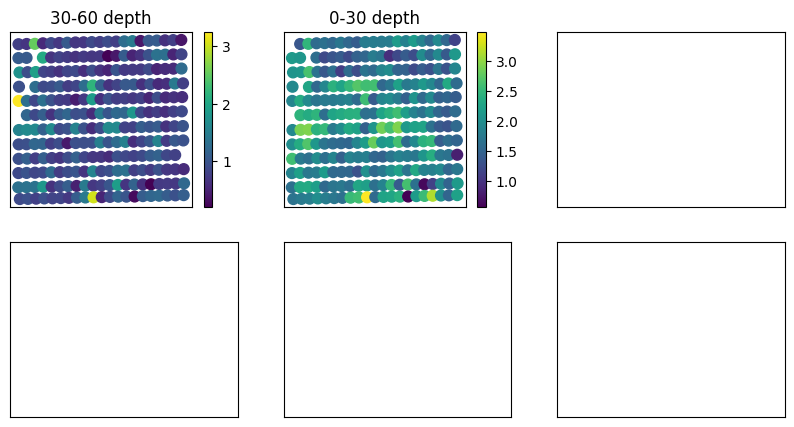

NE


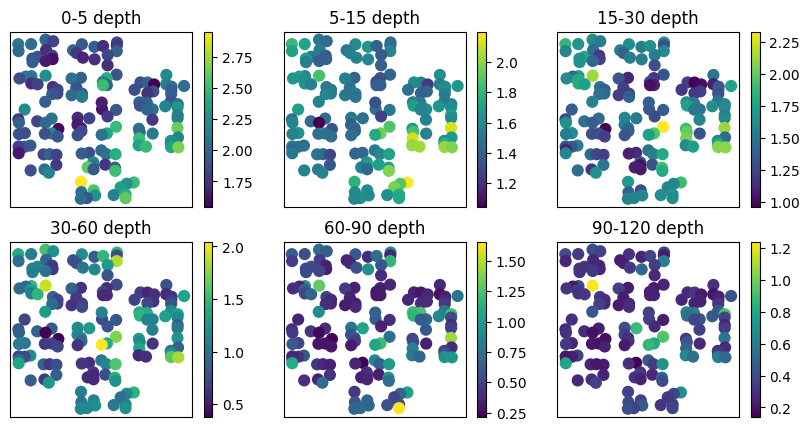

IL-RT


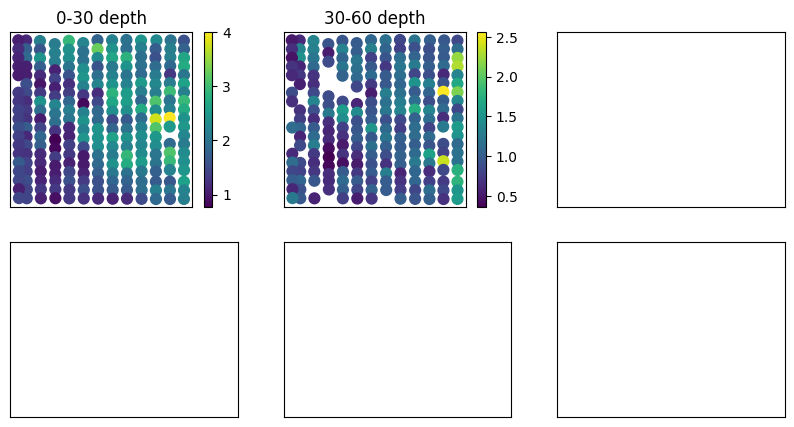

IL-PT


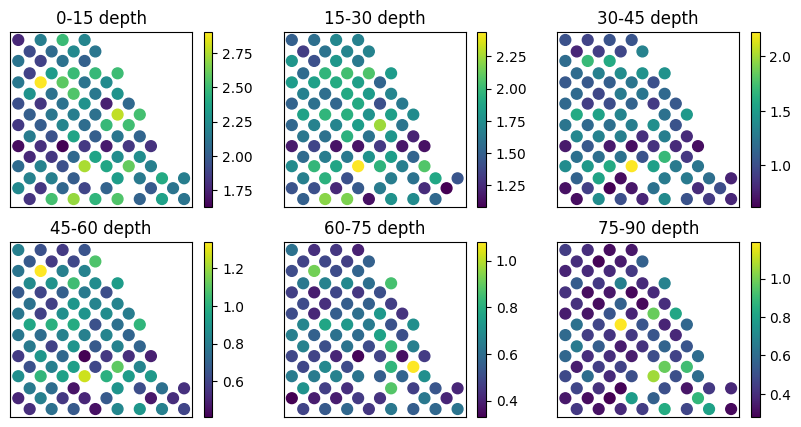

IL-BR


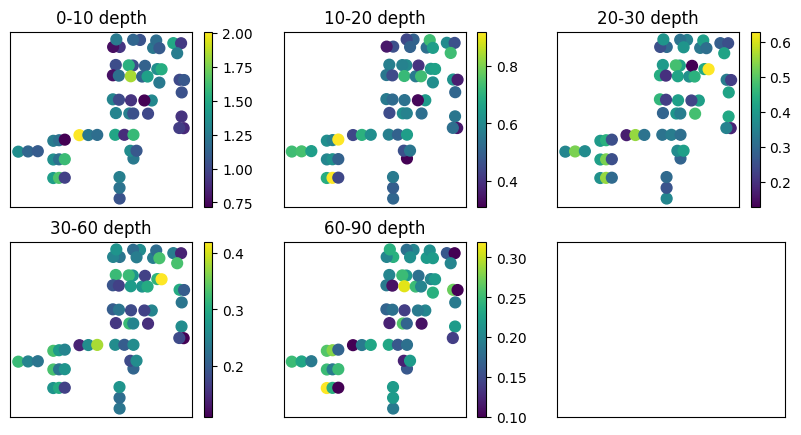

IL-DG


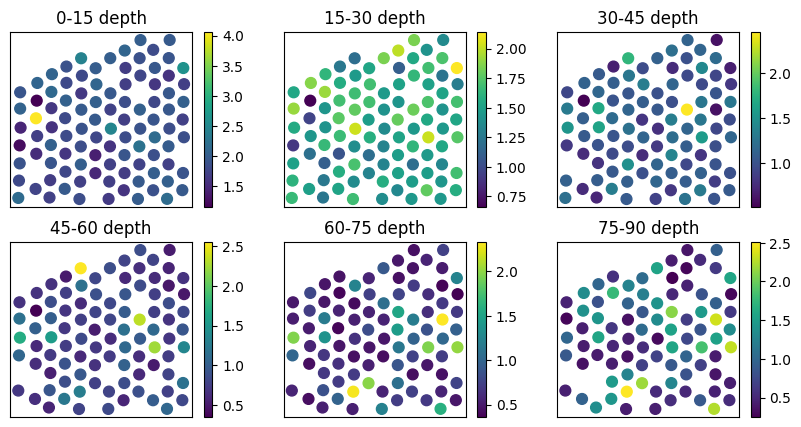

IL-RS


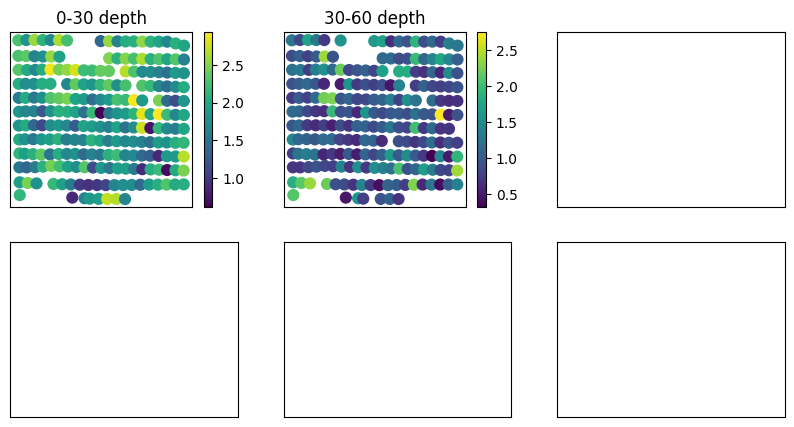

IL-MC


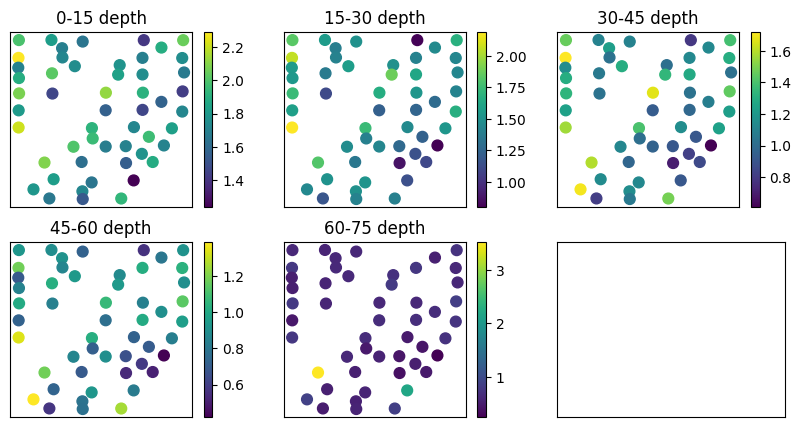

In [18]:
df_loc = pd.read_csv('./data/U.S. Midwest fields/locations.csv')
df_mes = pd.read_csv('./data/U.S. Midwest fields/measurements.csv')

sites_names = set(df_loc['site'])

for site in sites_names:
    print(site)

    fig, axs = plt.subplots(2, 3, figsize=(10, 5))
    size = 60

    sites = {}

    ds = df_mes[df_mes['site'] == site]
    
    for index, row in ds.iterrows():

        sample_depth_min = row['sample_depth_min']
        sample_depth_max = int(row['sample_depth_max'])

        key = str(sample_depth_min) + "-" + str(sample_depth_max)

        if key not in sites:
            sites[key] = {
                "X" : [],
                "Y" : [],
                "SOCc" : [],
                "BD" : []
            }


        row_loc = df_loc[df_loc['location_id'] == row['location_id']]
        row_loc = row_loc[row_loc['site'] == site]

        X = row_loc['X'].iloc[0]
        Y = row_loc['Y'].iloc[0]

        SOCc = row['SOCc']
        BD = row['BD']
        
        sites[key]['X'].append(X)
        sites[key]['Y'].append(Y)
        sites[key]['SOCc'].append(SOCc)
        sites[key]['BD'].append(SOCc)

    for key in list(sites.keys()):
        if len(sites[key]['X']) < 3:
            sites.pop(key)

    for i, key in enumerate(sites):
        riga = i // 3
        colonna = i % 3
        p = axs[riga, colonna].scatter(sites[key]['X'], sites[key]['Y'], s=size, c=sites[key]['SOCc'])
        axs[riga, colonna].set_title(key + " depth")
        plt.colorbar(p)

    for i in range(6):
        riga = i // 3
        colonna = i % 3
        axs[riga, colonna].xaxis.set_visible(False)
        axs[riga, colonna].yaxis.set_visible(False)

    plt.show()

IL-BR


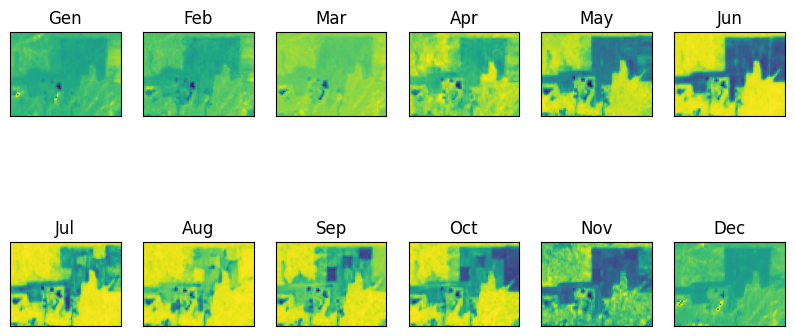

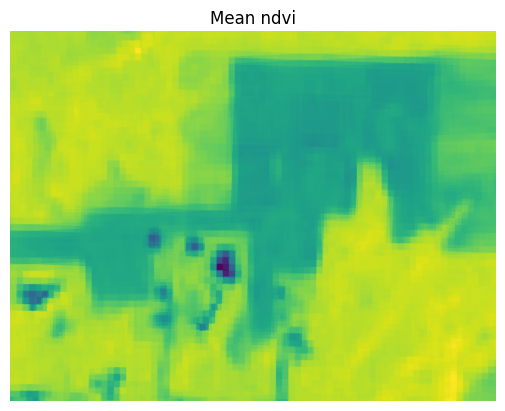

IL-DG


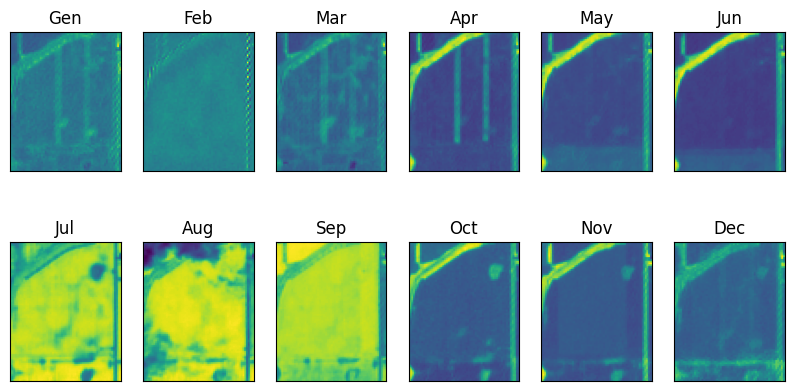

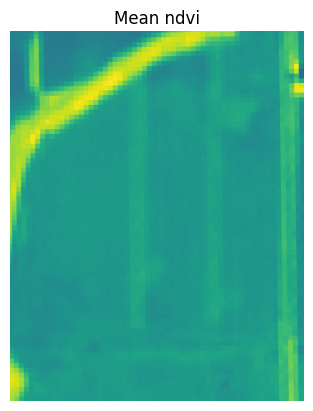

IL-MC


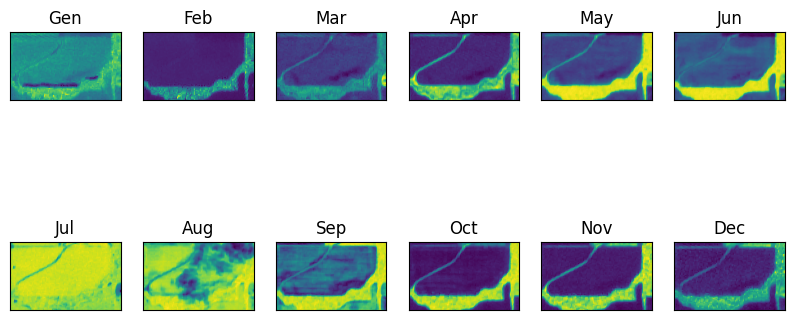

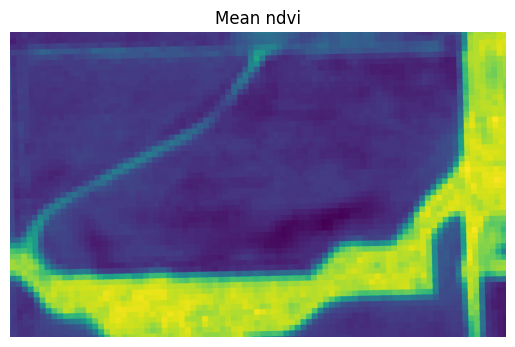

IL-PT


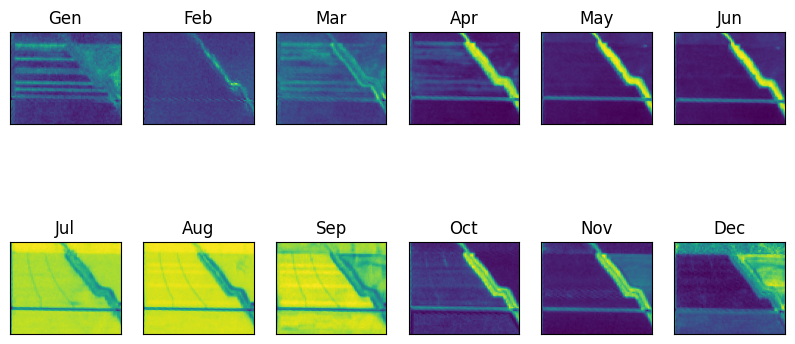

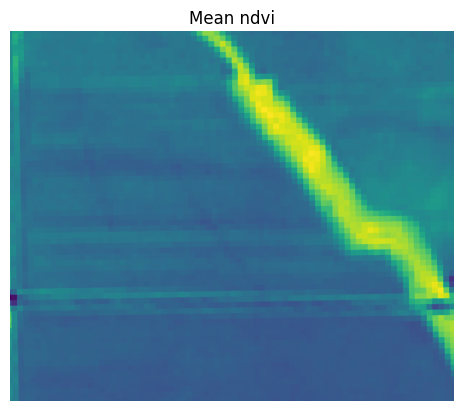

IL-RD


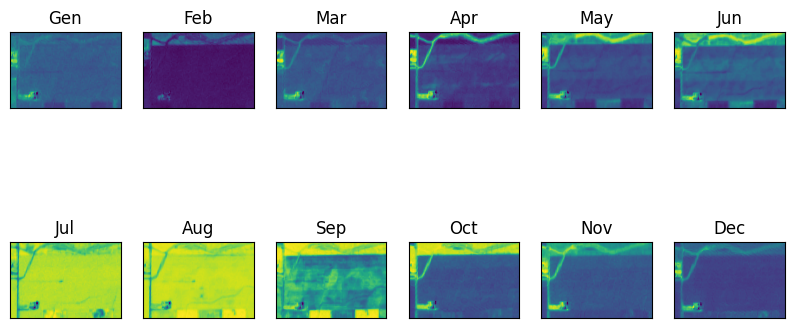

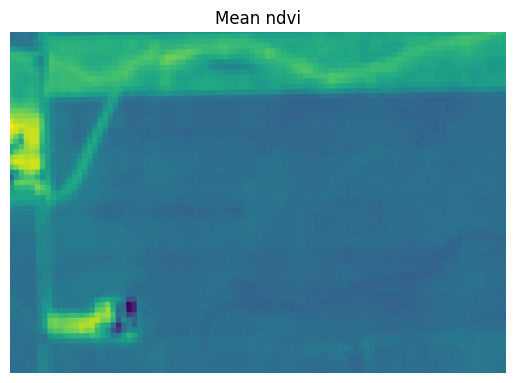

IL-RS


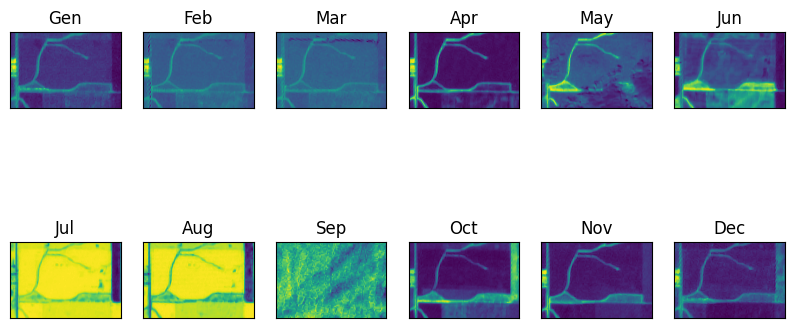

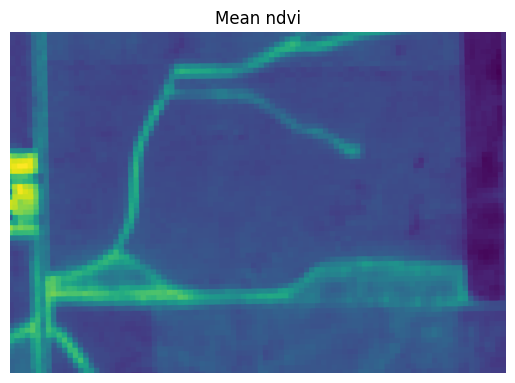

IL-RT


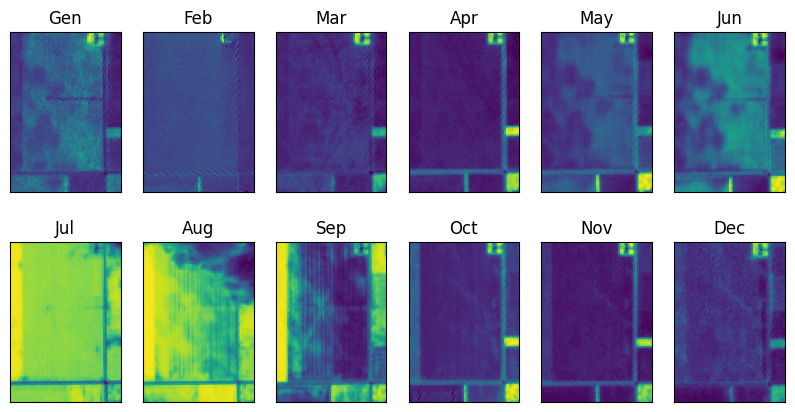

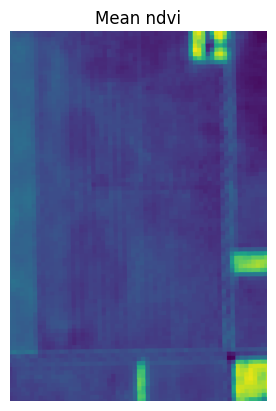

NE


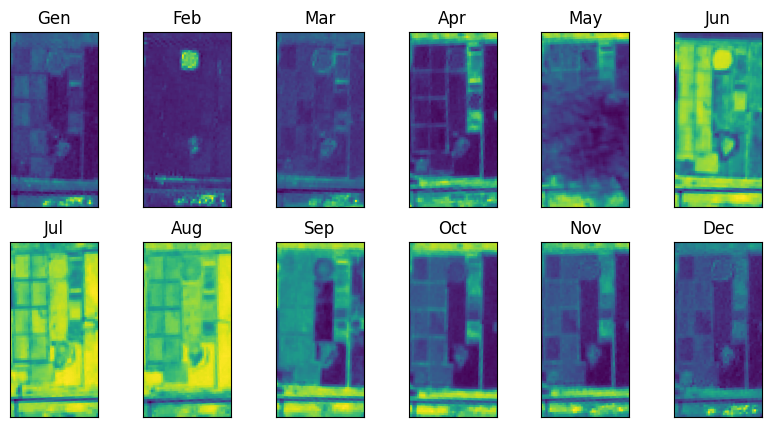

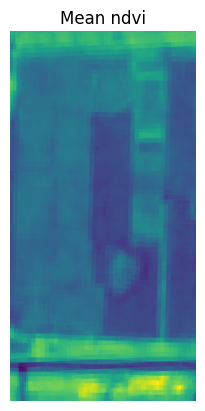

In [19]:
mounths = ['Gen', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for field in os.listdir('data/U.S. Midwest fields/immagini'):

    print(field)

    fig, axs = plt.subplots(2, 6, figsize=(10, 5))

    for i in range(len(axs)):
        for j in range(len(axs[i])):
            axs[i][j].set_title(mounths[i*6 + j])

    found = False

    for name in os.listdir('data/U.S. Midwest fields/immagini/' + field):

        raster = rasterio.open('data/U.S. Midwest fields/immagini/' + field + "/" + name + "/response.tiff")

        mounth = int(name.split('-')[1]) - 1

        red = numpy.array(raster.read(4), dtype=numpy.float64) / 10000
        nir = numpy.array(raster.read(8), dtype=numpy.float64) / 10000
        ndvi = (nir - red) / (nir + red)

        if not found:
            mean = ndvi
            found = True
        else:
            mean += ndvi

        axs[mounth // 6, mounth % 6].imshow(ndvi)
        axs[mounth // 6, mounth % 6].xaxis.set_visible(False)
        axs[mounth // 6, mounth % 6].yaxis.set_visible(False)

        raster.close()

    mean /= 12

    plt.show()
    plt.imshow(mean)
    plt.title("Mean ndvi")
    plt.axis("off")
    plt.show()

In [20]:
# import matplotlib.pyplot as plt

# sites = {}

# for index in df_loc.index:
#     site = df_loc['site'].iloc[index]
#     x = df_loc['X'].iloc[index]
#     y = df_loc['Y'].iloc[index]

#     if site not in sites:
#         sites[site] = {
#             "x" : [],
#             "y" : []
#         }

#     sites[site]["x"].append(x)
#     sites[site]["y"].append(y)

# figure, axes = plt.subplots(3, 3, figsize=(20, 20))

# cont = 1
# for site in sites:
#     plt.subplot(3, 3, cont)
#     plt.scatter(sites[site]['x'], sites[site]['y'])
#     plt.title("site " + str(site))
#     cont += 1

In [21]:
# df_mea = pd.read_csv('./data/U.S. Midwest fields/measurements.csv')

# sites = {}

# for index in df_mea.index:
#     site = df_mea['site'].iloc[index]
#     sample_depth_min = df_mea['sample_depth_min'].iloc[index]
#     sample_depth_max = int(df_mea['sample_depth_max'].iloc[index])
#     SOCc = df_mea['SOCc'].iloc[index]
#     BD = df_mea['BD'].iloc[index]

#     if site not in sites:
#         sites[site] = {}

#     key = str(sample_depth_min) + "-" + str(sample_depth_max)

#     if key not in sites[site]:
#         sites[site][key] = {
#             "SOCc" : [],
#             "BD" : []
#         }

#     sites[site][key]['SOCc'].append(SOCc)
#     sites[site][key]['BD'].append(SOCc)

# for site in sites:
#     print("site :", site)
#     for key in sites[site]:
#         print("in", key, "topsoil, mean SOCc is", 
#               sum(sites[site][key]["SOCc"]) / len(sites[site][key]["SOCc"]),
#               "and mean BD is", 
#               sum(sites[site][key]["BD"]) / len(sites[site][key]["BD"]))
#     print()